<a href="https://colab.research.google.com/github/E-wave112/ml-dl/blob/master/ctGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date  Symbol     Open  ...    Close  Volume BTC   Volume USD
0  2020-04-10  BTCUSD  7315.25  ...  7315.25        0.00         0.00
1  2020-04-09  BTCUSD  7369.60  ...  7315.25     2237.13  16310014.53
2  2020-04-08  BTCUSD  7201.81  ...  7369.60     2483.60  18138080.27
3  2020-04-07  BTCUSD  7336.96  ...  7201.81     2333.34  17047120.32
4  2020-04-06  BTCUSD  6775.21  ...  7336.96     3727.47  26533750.17

[5 rows x 8 columns]


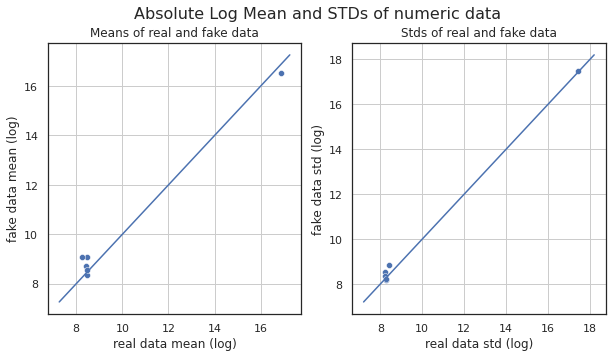

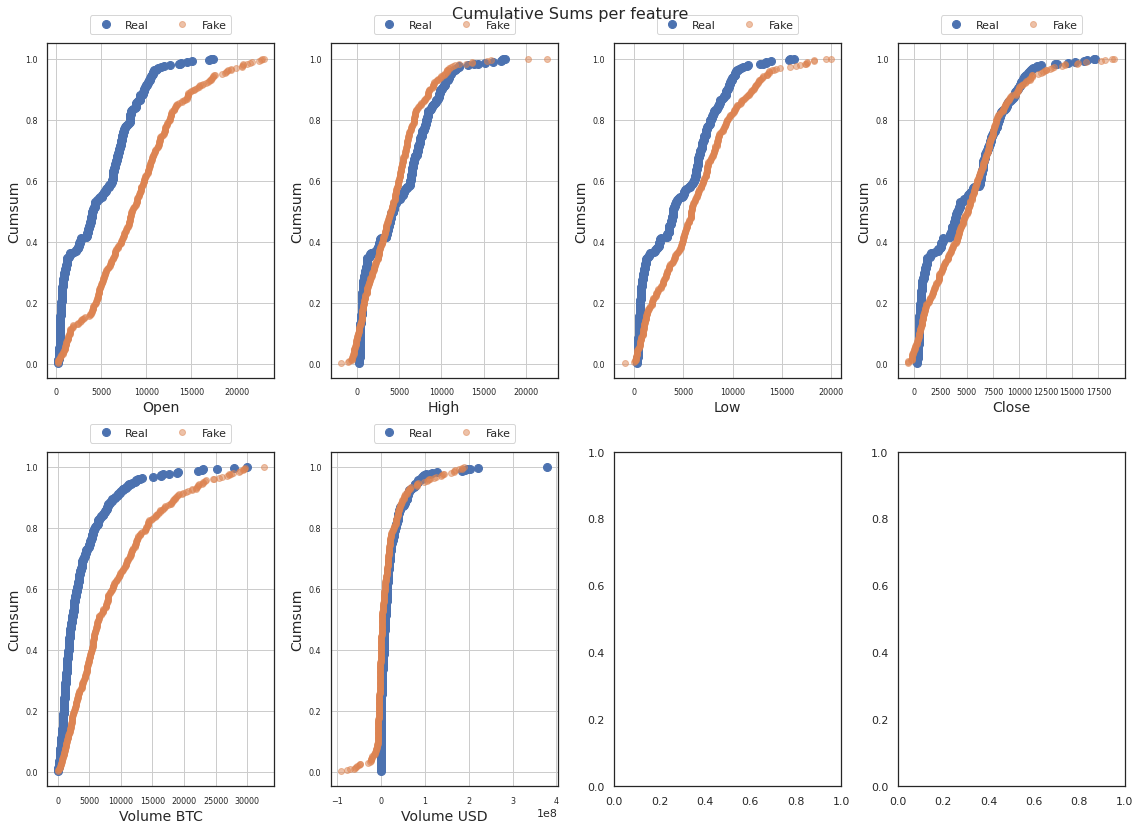

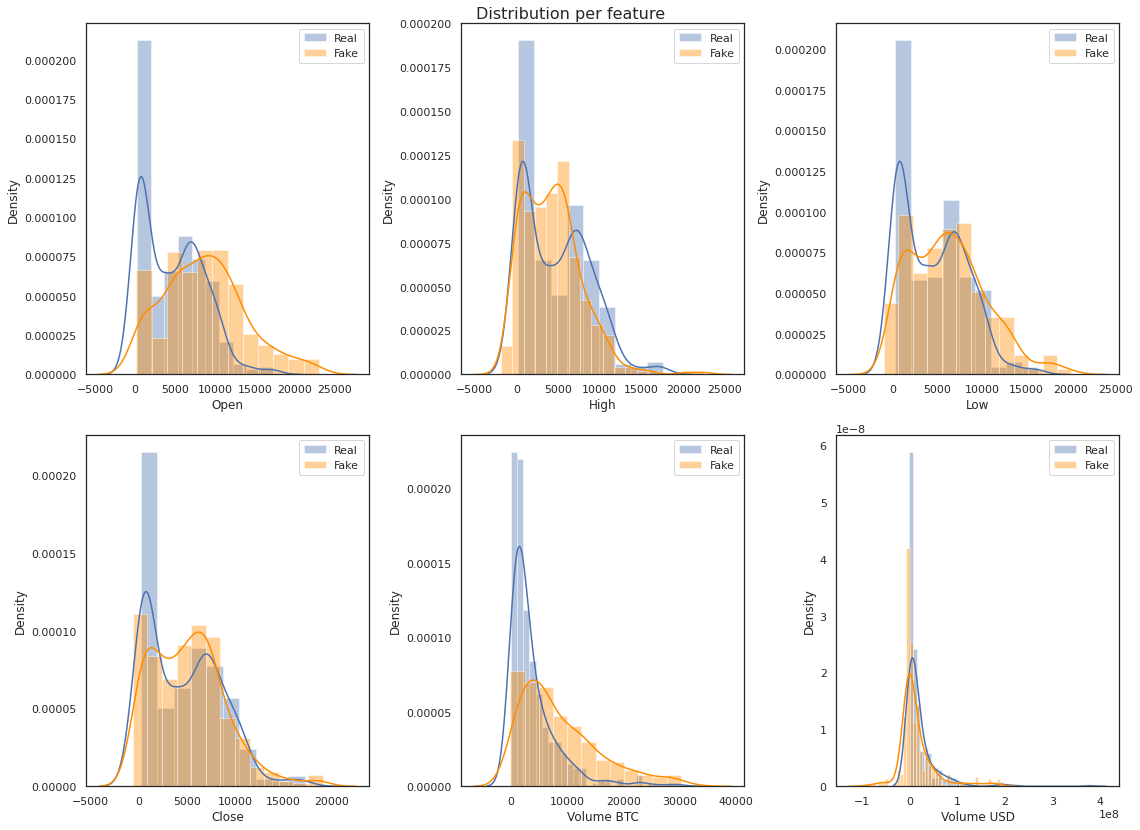

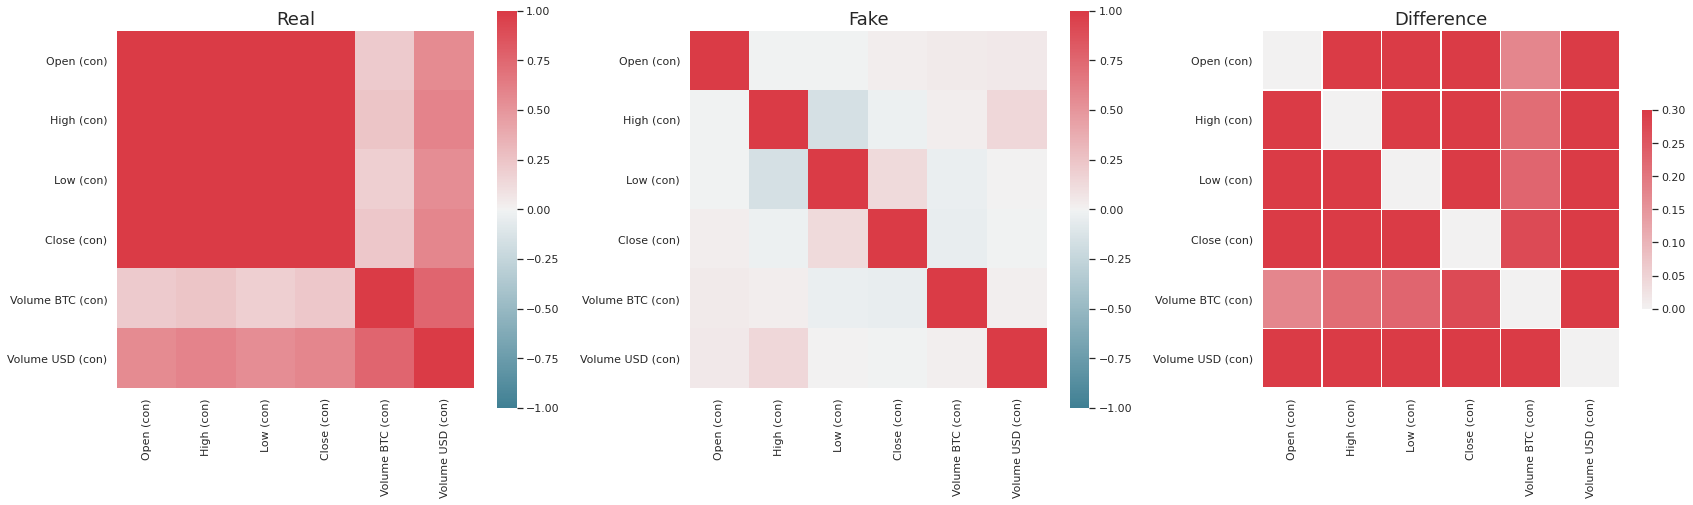

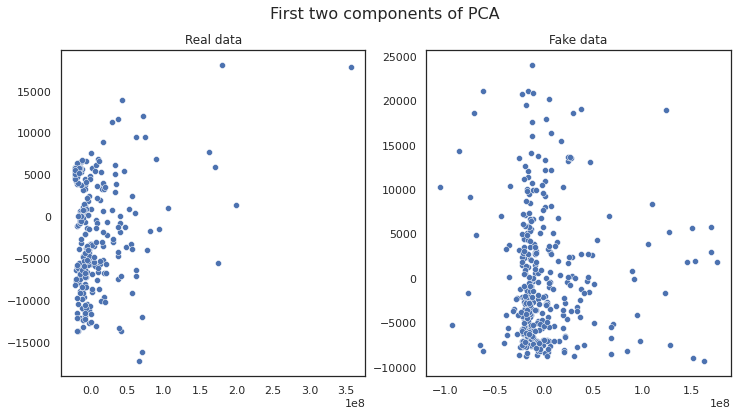

         Date  Symbol          Open  ...        Close    Volume BTC    Volume USD
0  2021-04-11  BTCUSD  11758.108799  ...  4540.656849  12825.884870  3.335449e+07
1  2021-04-10  BTCUSD  12337.265856  ...  -171.567119   1079.854388 -4.143544e+06
2  2021-04-09  BTCUSD  -3033.071255  ...   622.971792   5186.593295  1.087071e+07
3  2021-04-08  BTCUSD    459.677615  ...  6317.871454   1114.205875  1.069738e+06
4  2021-04-07  BTCUSD   1629.203856  ...  6961.208656  10734.378189 -2.612323e+06

[5 rows x 8 columns]


In [116]:
import ctgan
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,timedelta,date
from ctgan import CTGANSynthesizer
import pandas as pd
from table_evaluator import load_data, TableEvaluator

df = pd.read_csv('/content/drive/MyDrive/BTCUSD_day.csv')
##print the first five rows of your dataset for a little overview
print(df.head())

save_df = df
# sorted columns for new synthetic data as we will be using this to sort the new columns for our synthetic dataset
sorted_columns = [ i for i in df.columns]

##the number of synthetic samples i want to generate fro this data

SAMPLES = 365

##store the last date in a variable, we will use this later for our synthetic dataset
last_date_1 = df.Date[0]
##format to a date format and let our loop count equal the number of SAMPLES we wish to generate
last_date = tuple(last_date_1.split('-'))
last_date_int = tuple([int(i) for i in last_date])
last_date_split = date(*last_date_int) +timedelta(1)
date_for_syn_data = []
for i in range(SAMPLES,0,-1):
  new = last_date_split + timedelta(i)
  date_for_syn_data.append(datetime.strftime(new,'%Y-%m-%d'))

##we can now drop the dates and symbols column
df_syn = df.drop(['Date','Symbol'],1)
new_df = df_syn
##instantiate the CTGANSynthesizer class
ctgan_syn = CTGANSynthesizer(epochs=15)
ctgan_syn.fit(new_df)

##generate 365 samples
ct_data = ctgan_syn.sample(SAMPLES)

##check for similarities between the real data and synthetic data
table_evaluator = TableEvaluator(new_df, ct_samples)
table_evaluator.visual_evaluation()

# format all numbers to 2 decimal places
def to_two_dp(x):
  return round(x,2)

ct_data.apply(lambda x:to_two_dp(x))

##create the btc symbol and date column
ct_data['Symbol'] = ['BTCUSD' for i in range(SAMPLES)]
ct_data['Date'] = date_for_syn_data

##resort the columns of our dataset
ct_data_sort = ct_data.reindex(sorted_columns, axis=1)
##print our newly ordered synthetic dataset
print(ct_data_sort.head())



In [117]:
##merge the real data and synthetic data and save to a csv file
df_new = pd.concat([ct_data_sort,save_df],ignore_index=True)
df_new.to_csv('/content/drive/MyDrive/BTC_USD_version-2.csv',index=False)
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2012 non-null   object 
 1   Symbol      2012 non-null   object 
 2   Open        2012 non-null   float64
 3   High        2012 non-null   float64
 4   Low         2012 non-null   float64
 5   Close       2012 non-null   float64
 6   Volume BTC  2012 non-null   float64
 7   Volume USD  2012 non-null   float64
dtypes: float64(6), object(2)
memory usage: 125.9+ KB
None
